In [1]:
from keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt

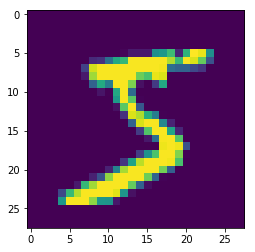

In [6]:
plt.imshow(x_train[0])

In [3]:
import h5py 
import time
import numpy as np
import matplotlib.pyplot as plt


D:\nparray\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
def load_data():
    
    train_dataset = h5py.File('C:/Users/a/Desktop/Classic_machine_learning-master/data_set/train_catvnoncat.h5',"r")
    train_set_x = np.array(train_dataset["train_set_x"][:])
    train_set_y = np.array(train_dataset["train_set_y"][:])
    
    test_dataset = h5py.File('C:/Users/a/Desktop/Classic_machine_learning-master/data_set/test_catvnoncat.h5',"r")
    test_set_x = np.array(test_dataset["test_set_x"][:])
    test_set_y = np.array(test_dataset["test_set_y"][:])
    
    classes = np.array(test_dataset["list_classes"][:])
    
    return train_set_x,train_set_y,test_set_x,test_set_y,classes

In [5]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [6]:
train_x = train_x_orig.reshape(train_x_orig.shape[0],-1) / 255   # 将train-x压缩到0~1之间
test_x = test_x_orig.reshape(test_x_orig.shape[0],-1) / 255

In [7]:
train_y



array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [8]:
test_x.shape

(50, 12288)

In [9]:
train_y.shape


(209,)

In [10]:
test_y.shape

(50,)

In [11]:
train_x_orig.shape

(209, 64, 64, 3)

y = 1. It's a cat picture.


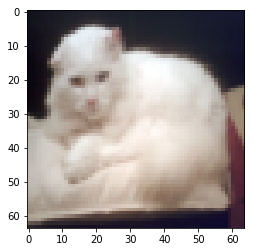

In [12]:
index = 13

plt.imshow(train_x_orig[index])  #查看图片
print ("y = " + str(train_y[index]) + ". It's a " + classes[train_y[index]].decode("gbk") +  " picture.")

In [71]:
class UP():
    
    def __init__(self,alpha,epochs):
        self.alpha = alpha
        self.epochs = epochs
#         self.a = a
        
    def initia(self,n):
        w= np.zeros(shape=(n,1))
        b = 0
        return w,b
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def fit(self,data,y):
        m,n = data.shape
        w,b = self.initia(n)
        for i in range(self.epochs):
#             time.sleep(0.1)
            z = np.dot(data,w) + b
            A = self.sigmoid(z)
            y = np.reshape(y,(m,1))  #从新定义形状
#             if loss == orange:
            loss = - np.sum(y*np.log(A) + (1-y)*np.log(1-A)) / m   # 损失函数
#             elif L1 == L1:
                
#                 L1 = -np.sum[y*np.log(A) - (1 - y) * np.log(A)] / m +a*sgn(w) 
#             elif L2 == L2:
#                 L2 = -np.sum[y*np.log(A) - (1 - y) * np.log(A) ] / m+a*w 
            dz = A - y
            dw = np.dot(data.T,dz) / m
            db = np.sum(dz,keepdims=True,axis=0) / m   #  keepdims是保持维度
            w = w - self.alpha * dw
            b = b - self.alpha * db
            acc = self.score(data,y,w,b)
            print('\033[5;36;47m [%d/%d] loss is :%f acc(train):%f \r'% (i + 1,self.epochs,loss,acc),end="",flush=True)
        return w,b
    
    def score(self,data,y,w,b):
        z = np.dot(data,w) + b
        A = self.sigmoid(z)
       
       
        y_hat = np.round(A)
        acc = (y_hat == y).sum() / y.size   #计算
        return acc
    def prodict(self,data,w,b):
        z = np.dot(data,w) + b
        A = self.sigmoid(z)
        y_hat = np.round(A)
        return y_hat

In [72]:
test_x = test_x.T

In [73]:
up = UP(0.01,300)
w,b = up.fit(data=train_x,y=train_y)

In [74]:
test_x.shape

(12288, 50)

In [75]:
train_x.shape

(209, 12288)

In [76]:
test_x = test_x.reshape((50,12288))
test_y = test_y.reshape((50,1))
acc = up.score(data=test_x,y=test_y,w=w,b=b)

In [77]:
acc

0.66

In [78]:
import matplotlib.image as mpimg

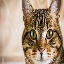

In [84]:
from PIL import Image
im = Image.open('C:/Users/a/Desktop/lena.png') # 加载图片
im = im.resize((64,64))    #从新定义大小 宽，高
im

In [85]:
im_arrary = np.array(im)  #把图片转换成数组


In [86]:
im_arrary.shape

(64, 64, 3)

In [87]:
projuct = im_arrary.reshape((1,-1))    #从新定义形状

In [88]:
sort = up.prodict(data=projuct,w=w,b=b)

In [89]:
sort

array([[1.]])